## 로지스틱 회귀분류 모델

In [1]:
## 데이터 준비하기
# - 구글드라이브 > Dataset > 머신러닝 > data > 05_생선_분류_데이터셋.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
fish = pd.read_csv('./data/05_생선_분류_데이터셋.csv',encoding='utf-8-sig')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
# Species -> Weight -> Length -> Diagonal -> Height -> Width
# 종류       무게      길이       대각선     높이       두께

In [5]:
### 종류 특성의 고유한 값 조회하기
# fish['Species'].unique()
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
### 독립변수 추출하기
# - 변수명은 fish_input
# - 사이킷런 훈련에 사용하는 형태로 만들어주세요.. 출력까지..
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
### 종속변수 만들기
# - 변수명 : fish_target
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [8]:
### 훈련데이터와 테스트데이터로 나누기
# - 변수명 어제와 동일
# - seed = 42

### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input , test_input, train_target, test_target = \
train_test_split(fish_input,fish_target,test_size = 0.25, random_state = 42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [9]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled
### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
scaler = StandardScaler()

### 스스로 표준점수 생성
scaler.fit(train_input,train_target)

### 훈련데이터를 표준점수로 변환하기
train_scaled = scaler.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = scaler.transform(test_input)

### 샘플 5개 행 출력해보기
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [10]:
### k-최근접이웃분류 모델로 테스트
#
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled,train_target)
pred = kn.predict(test_scaled[:5])
### 훈련데이터 정확도
print(kn.score(train_scaled,train_target))
### 테스트데이터 정확도
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [11]:
pred

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [12]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [13]:
### 상위 5개 예측하기
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

# [[실제값, 예측값] , [실제값, 예측값]....]
print([a for a in zip(pred,test_target[:5])])
print(np.column_stack((test_target[:5], kn.predict(test_scaled[:5]))))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']
[('Perch', 'Perch'), ('Smelt', 'Smelt'), ('Pike', 'Pike'), ('Perch', 'Whitefish'), ('Perch', 'Perch')]
[['Perch' 'Perch']
 ['Smelt' 'Smelt']
 ['Pike' 'Pike']
 ['Whitefish' 'Perch']
 ['Perch' 'Perch']]


In [14]:
### 각 행의 범주들의 확률값 확인
# - 확률값의 범위 : 0 ~ 1 (0% ~ 100 %)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - 사이킷런 분류 모델 공통으로 사용됨...
# - 거리적인 확률이지 범주적인 확률이 아니라서 다중분류확률은 크게 의미가없다
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [15]:
# 순수한 데이터프레임 값
print(pd.unique(fish['Species']))

# 훈련모델이 가지고 있는 범주의 리스트 값 확인
# 해석할때 꼭 알아야 한다
# 알파벳 순서로 오름차순 정렬이다
# classes모르면 unique한다음에 오름차순 정렬하면 된다

print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [16]:
## 5개의 데이터의 이웃들 확인하기..
# - 각 행마다 이웃이 3개씩
distances, indexes = kn.kneighbors(test_scaled[:5])
# print(distances)
# print(indexes)
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']
 ['Smelt' 'Smelt' 'Smelt']
 ['Pike' 'Pike' 'Pike']
 ['Roach' 'Perch' 'Perch']
 ['Perch' 'Perch' 'Roach']]


In [17]:
# 강사님풀이
distances, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)
for test_data in test_scaled[:5] :
    distances, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]
[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]


## 로지스틱 회귀분류(Logistic Regression)
##### 분류에서 많이쓰고있고 선형쪽에는 많이 안쓴다

In [18]:
### 선형방정식 사용 : 다중회귀 방정식과 동일
# - z = a * x1 + b * x2 ... + y절편
# - z값 구하는 함수 : decision_function(훈련데이터)
# - Z값의 범위 : 0보다 작거나 크거나 ...
### 확률 : 0~1 사이의 값을 사용 (0% ~ 100%)
# - 따라서, Z값은 확률의 0~1사이의 값으로 변환하는 작업이 필요...
### 이때 사용하는 방법
# - 시그모이드 방식(이진분류방식 사용),
# - 소포트맥스 방식(다중분류방식 사용)
# (모두 함수 지원됨)

## 로지스틱 회귀로 이진분류하기
##### - 시그모이드 함수 사용

In [19]:
train_scaled
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [20]:
### 이진분류 방식은 2개의 범주만 사용가능합니다.
# - 기존 데이터에서 2개(Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 - train_bream_smelt
# 종속변수명 - target_bream_smelt
ffish = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Smelt')]
print(ffish.columns)
train_bream_smelt = ffish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
target_bream_smelt = ffish['Species'].to_numpy()

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [21]:
# 인덱스 뽑기 방식
indexes = []
for i in range(len(train_target)):
    if (train_target[i] == 'Bream') | (train_target[i] == 'Smelt'):
        indexes.append(i)

In [22]:
indexes

[0,
 2,
 7,
 11,
 15,
 16,
 19,
 21,
 25,
 28,
 33,
 36,
 37,
 43,
 49,
 51,
 54,
 58,
 65,
 67,
 77,
 79,
 82,
 83,
 87,
 93,
 97,
 99,
 102,
 103,
 112,
 113,
 116]

In [23]:
train_bream_smelt = train_scaled[indexes]

In [24]:
target_bream_smelt = train_target[indexes]
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [25]:
# 리스트에서 바로 뽑는 방식
target_bream_smelt = train_target[(train_target == 'Bream') | (train_target == 'Smelt')]
len(target_bream_smelt)

33

In [26]:
train_bream_smelt = train_scaled[(train_target == 'Bream') | (train_target == 'Smelt')]
len(train_bream_smelt)

33

In [27]:
# 강사님 풀이
target_bream_smelt = train_target[(train_target == 'Bream') | \
                                  (train_target == 'Smelt')]
train_bream_smelt = train_scaled[(train_target == 'Bream') | \
                                 (train_target == 'Smelt')]

In [28]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
lr.score(train_bream_smelt,target_bream_smelt)
# lg.score(train_bream_smelt,target_bream_smelt)

1.0

In [29]:
## 예측 상위 5개
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [30]:
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [31]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [32]:
# 순수한 데이터프레임 값
print(pd.unique(target_bream_smelt[:5]))
print(lr.classes_)

['Bream' 'Smelt']
['Bream' 'Smelt']


In [33]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [34]:
# 컬럼명 알파벳순 오름차순 정렬한걸로 고려해야한다
# -0.4037798*Diagonal + -0.57620209*Height, Length, Weight, Width + -2.16155132

In [35]:
# 이진분류에서 z값 (선형방정식의 결과값들)을 0~1로 변환 ...
# z값 조회하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [36]:
### <시그모이드 함수(sigmoid funcion) 또는 로지스틱 함수>.....
# - 이진분류라고 합니다.
# - 종속변수의 항목(특성, 컬럼)은 2개일 때 주로 사용됨
# - 범주 2개일 때 주로 사용됨

# - 사용 패키지 : from scipy.special
# - 사용 모듈 : import expit
# - 사용 함수 : expit(z값)

# - 0/1, Y/N 처럼 둘중 하나로 분류 할 때
#  (기존에 KNN에서 사용 했었습니다.)
# - 시그모이드 값의 범위 : 0과 1 사잇값 (0% ~ 100%)
# - 범주들의 z 값을 기준으로 0과 1의 사잇값으로 변환하여 반환한다.

# - 변환 공식 : 1 / (1 + np.exp(-z))
#  : np.exp() : 지수값으로 변환하는 함수 (0~1)
#  : -z : z값은 음수 사용
#  : z = 0 일때, 확률은 0.5(50%)
#  : z > 0 일때, 확률은 > 0.5 (51% 이상 ) --> 예측 확률이 높음
#  : z < 0 일때, 확률은 < 0.5 (49% 미만)
# - 여러 개 범주들 중에 확률이 가장 높은 범주 선택

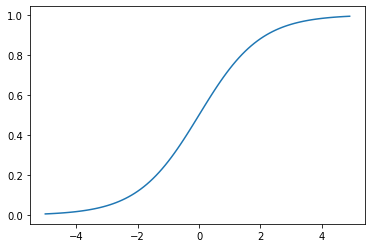

In [37]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
z = np.arange(-5, 5, 0.1)

### 시그모이드 공식 사용
# -np.exp() : 0~1의 지수로 변환하기
#           : z값의 스케일을 통일 시키기 위해서
#           : z값은 음수로 처리(제곱승 시에 분모로 계산)
#           : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

## x축은 z 
## y축은 시그모이드 산출값

## 다중분류

In [57]:
### 다중분류는 모든 범주를 사용합니다.
# - 독립변수도 모든 특성을 사용합니다.
# - 모든 특성을 사용하다 보니 복잡도에 대한 부분을 고려해야 합니다.
# - (너무 복잡해도 안되고, 느슨해도 안되고, 적당히 ... )
# - 사용하는 클래스 : 이진분류와 동일
# - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용

# - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
# : alpha 값은 클수록 강도가 커졌다면,
# : C값은 작을수록 강도가 커집니다.
# : 기본값은 1. 보통 20정도로 완화 시킨 후 진행

# - 훈련반복횟수 사용
# : 훈련모델은 정확도를 높이기 위해 일반적으로 반복 수행을 합니다.
# : 기본 반복횟수 : 100회
# : 훈련 중에 100회보다 더 해야하는 경우 경고 창이 뜨는 경우 있음

# : 독립변수의 특성이 많을 수록 훈련 반복횟수가 늘어나는 경우 발생
# : 반복횟수 속성값 : max_iter
# : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
# - 이외 모든 훈련 함수는 기존과 동일

In [58]:
### 규제강도 = 20
### 반복횟수 = 1000회
# 훈련데이터와 테스트데이터에 대한 정확도 확인해 주세요..
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,train_target)
print('훈련 = ', lr.score(train_scaled,train_target))
print('테스트 = ', lr.score(test_scaled,test_target))

훈련 =  0.9327731092436975
테스트 =  0.925


In [64]:
### 상위 5건으로 예측 진행
pred = lr.predict(test_scaled[:5])

### 전체 범주별 확률 확인
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [71]:
## 계수 확인
print(test_scaled[:5])
print(lr.coef_, lr.intercept_)

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]
[[-1.49001669 -1.02911188  2.59344182  7.70358216 -1.20070535]
 [ 0.19618154 -2.01070049 -3.77975316  6.50491991 -1.99481795]
 [ 3.56280088  6.34356158 -8.48970479 -5.75757495  3.79306719]
 [-0.10458248  3.60320123  3.93067908 -3.61738454 -1.75069682]
 [-1.40061602 -6.07502954  5.2596964  -0.87219392  1.86043801]
 [-1.38526513  1.49213827  1.39225555 -5.67734539 -4.40097836]
 [ 0.62149789 -2.32405917 -0.90661489  1.71599673  3.69369327]] [-0.09205102 -0.26290669  3.25101219 -0.14742096  2.65498547 -6.78784574
  1.38422676]


In [67]:
### Z 산술연산 결과 확인하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [70]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


##### 질문
##### 이진분류에서 C랑 max_iter 파라미터 쓰면 그냥 다중분류로 바뀌는지
##### 이진분류에서 종속변수 2가지로 추출 안하고 그냥 돌리면 어떻게 되는지
##### 로지스틱 이외 분류알고리즘도 다중분류 되는지?